### Load the result file

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import logging
from feature_engineering import log_insight


In [4]:
# Create Log directory

log_dir='logs'
# os.makedirs(log_dir,exist_ok=True)

#Create Logger
logger=logging.getLogger('model_eval')
logger.setLevel("DEBUG")

#Stream console handler
console_handler=logging.StreamHandler()
console_handler.setLevel('DEBUG')

#Set log file path
log_file_path=os.path.join(log_dir,'model_eval.log')
file_handler=logging.FileHandler(log_file_path)
file_handler.setLevel('DEBUG')

# Define Formatter
log_formatter=logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(log_formatter)
file_handler.setFormatter(log_formatter)

logger.addHandler(console_handler)
logger.addHandler(file_handler)

In [5]:
def log_insight(msg: str):
    """Log insight to logger + write to results text file."""
    logger.info(msg)
    with open(results_file_path, "a", encoding="utf-8") as f:
        f.write(msg + "\n")

In [7]:
result=pd.read_csv(r'..\result\model_training_results.csv')
result.head()

,Fold,Model,Accuracy,Method,K
0,0,SVM,0.4752,Univeriate,1
1,0,guass_nb,0.4920,Univeriate,1
2,1,SVM,0.4928,Univeriate,1
3,1,guass_nb,0.4864,Univeriate,1
4,2,SVM,0.5024,Univeriate,1


In [8]:
result.describe(include='all')

,Fold,Model,Accuracy,Method,K
count,1200.000000,1200,1200.000000,1200,1200.000000
unique,NaN,2,NaN,4,NaN
top,NaN,SVM,NaN,Univeriate,NaN
freq,NaN,600,NaN,300,NaN
mean,24.500000,NaN,0.817244,NaN,2.000000
std,14.436886,NaN,0.151371,NaN,0.816837
min,0.000000,NaN,0.436000,NaN,1.000000
25%,12.000000,NaN,0.797200,NaN,1.000000
50%,24.500000,NaN,0.878400,NaN,2.000000
75%,37.000000,NaN,0.925400,NaN,3.000000


In [9]:
dim_reduction_name=['Univeriate','Feat_imp_score','PCA','LDA']

2025-11-15 19:33:05,494 - model_eval - INFO - Average accuracy per K (all models combined) for metho =Univeriate:    K  Accuracy
0  1  0.482224
1  2  0.597776
2  3  0.631208
2025-11-15 19:33:05,505 - model_eval - INFO - 
Average accuracy per K per Model for method= Univeriate
 Model       SVM  guass_nb
K                        
1      0.479568  0.484880
2      0.602432  0.593120
3      0.715328  0.547088


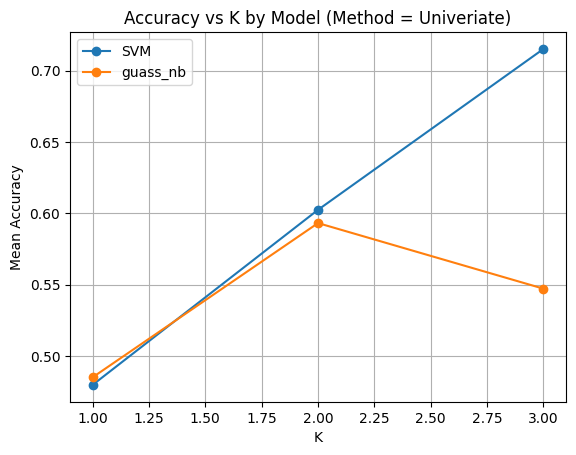

2025-11-15 19:33:05,958 - model_eval - INFO - Average accuracy per K (all models combined) for metho =Feat_imp_score:    K  Accuracy
0  1  0.843168
1  2  0.872552
2  3  0.890480
2025-11-15 19:33:05,967 - model_eval - INFO - 
Average accuracy per K per Model for method= Feat_imp_score
 Model       SVM  guass_nb
K                        
1      0.842288  0.844048
2      0.872784  0.872320
3      0.888816  0.892144


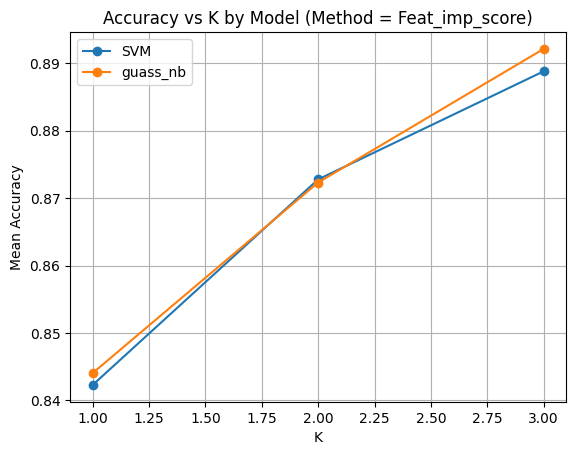

2025-11-15 19:33:06,358 - model_eval - INFO - Average accuracy per K (all models combined) for metho =PCA:    K  Accuracy
0  1  0.883152
1  2  0.890880
2  3  0.892352
2025-11-15 19:33:06,364 - model_eval - INFO - 
Average accuracy per K per Model for method= PCA
 Model       SVM  guass_nb
K                        
1      0.885120  0.881184
2      0.913584  0.868176
3      0.915152  0.869552


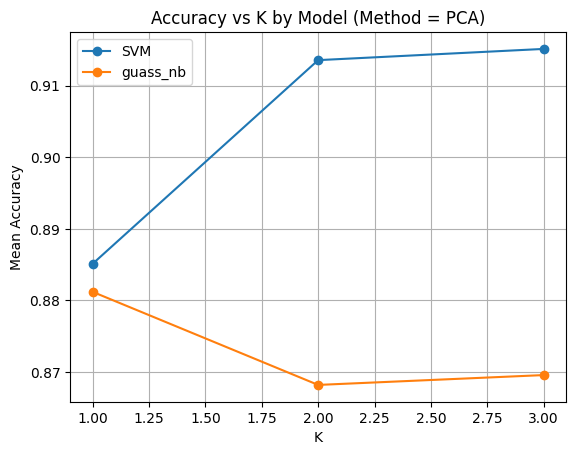

2025-11-15 19:33:06,760 - model_eval - INFO - Average accuracy per K (all models combined) for metho =LDA:    K  Accuracy
0  1  0.942432
1  2  0.941136
2  3  0.939568
2025-11-15 19:33:06,766 - model_eval - INFO - 
Average accuracy per K per Model for method= LDA
 Model       SVM  guass_nb
K                        
1      0.942896  0.941968
2      0.943184  0.939088
3      0.941200  0.937936


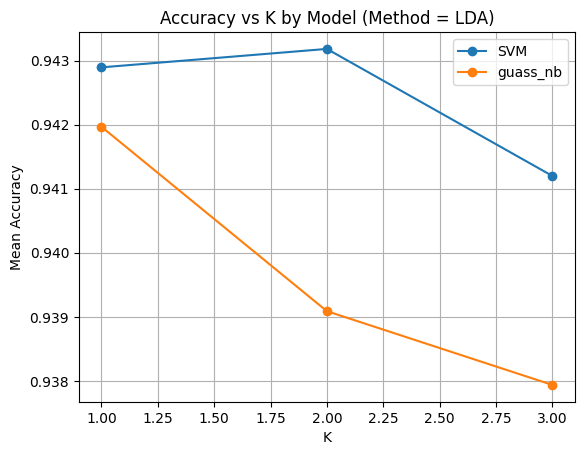

In [10]:
for i in dim_reduction_name:
    df = result.copy()
    df = df[df['Method'] == i].copy()

    df['K'] = pd.to_numeric(df['K'])
    
    mean_acc = ( df.groupby(['K', 'Model'], as_index=False)['Accuracy'].mean())
    mean_acc_per_k = (df.groupby('K', as_index=False)['Accuracy'].mean())
    msg=f"Average accuracy per K (all models combined) for metho ={i}: {mean_acc_per_k}"
    log_insight(msg)
    
    
    msg=f"\nAverage accuracy per K per Model for method= {i}\n {mean_acc.pivot(index='K', columns='Model', values='Accuracy')}"
    log_insight(msg)
    
    plt.figure()

    for model, grp in mean_acc.groupby('Model'):
        grp = grp.sort_values('K')          # ensure K is in order 1,2,3
        plt.plot(grp['K'], grp['Accuracy'],
                 marker='o',                 # dots on points
                 label=model)                # legend entry

    plt.xlabel('K')
    plt.ylabel('Mean Accuracy')
    plt.title(f'Accuracy vs K by Model (Method = {i})')
    plt.legend()
    plt.grid(True)
    fig_path = os.path.join(plots_dir, f'Accuracy vs K by Model (Method = {i}).png')
    plt.savefig(fig_path)
    plt.show()
